# Read Data

In [46]:
import pandas as pd

dataset = pd.read_csv("golf.csv")

test_dataset = pd.read_csv("golf_testset.csv")

print(dataset)

     Outlook  Temperature  Humidity   Wind Play
0      sunny         85.0      85.0  False   no
1      sunny         80.0      90.0   True   no
2   overcast         83.0      78.0  False  yes
3       rain         70.0      96.0  False  yes
4       rain         68.0      80.0  False  yes
5       rain         65.0      70.0   True   no
6   overcast         64.0      65.0   True  yes
7      sunny         72.0      95.0  False   no
8      sunny         69.0      70.0  False  yes
9       rain         75.0      80.0  False  yes
10     sunny         75.0      70.0   True  yes
11  overcast         72.0      90.0   True  yes
12  overcast         81.0      75.0  False  yes
13      rain         71.0      80.0   True   no


# Split Labels

In [47]:
training_set = dataset.copy()
y_true = training_set["Play"]
training_set.drop(columns="Play", inplace=True)
print(training_set)

     Outlook  Temperature  Humidity   Wind
0      sunny         85.0      85.0  False
1      sunny         80.0      90.0   True
2   overcast         83.0      78.0  False
3       rain         70.0      96.0  False
4       rain         68.0      80.0  False
5       rain         65.0      70.0   True
6   overcast         64.0      65.0   True
7      sunny         72.0      95.0  False
8      sunny         69.0      70.0  False
9       rain         75.0      80.0  False
10     sunny         75.0      70.0   True
11  overcast         72.0      90.0   True
12  overcast         81.0      75.0  False
13      rain         71.0      80.0   True


# Encode Labels

In [48]:
from sklearn.preprocessing import LabelEncoder
print(y_true)
label_encoder = LabelEncoder()
y_true = label_encoder.fit_transform(y_true)

print(y_true)

0      no
1      no
2     yes
3     yes
4     yes
5      no
6     yes
7      no
8     yes
9     yes
10    yes
11    yes
12    yes
13     no
Name: Play, dtype: object
[0 0 1 1 1 0 1 0 1 1 1 1 1 0]


# OneHotEncode Data

In [49]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
encoded = pd.DataFrame(encoder.fit_transform(training_set[['Outlook', 'Wind']]).toarray(), columns=encoder.get_feature_names_out(['Outlook', 'Wind']))

training_set.drop(columns=["Outlook", "Wind"], inplace=True)
training_set = pd.concat([training_set, encoded], axis=1)


# Train Classifier

In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier

estimator = KNeighborsClassifier(1)
# estimator = DecisionTreeClassifier(random_state=42)

estimator.fit(training_set, y_true)



KNeighborsClassifier(n_neighbors=1)

# Visualize Model

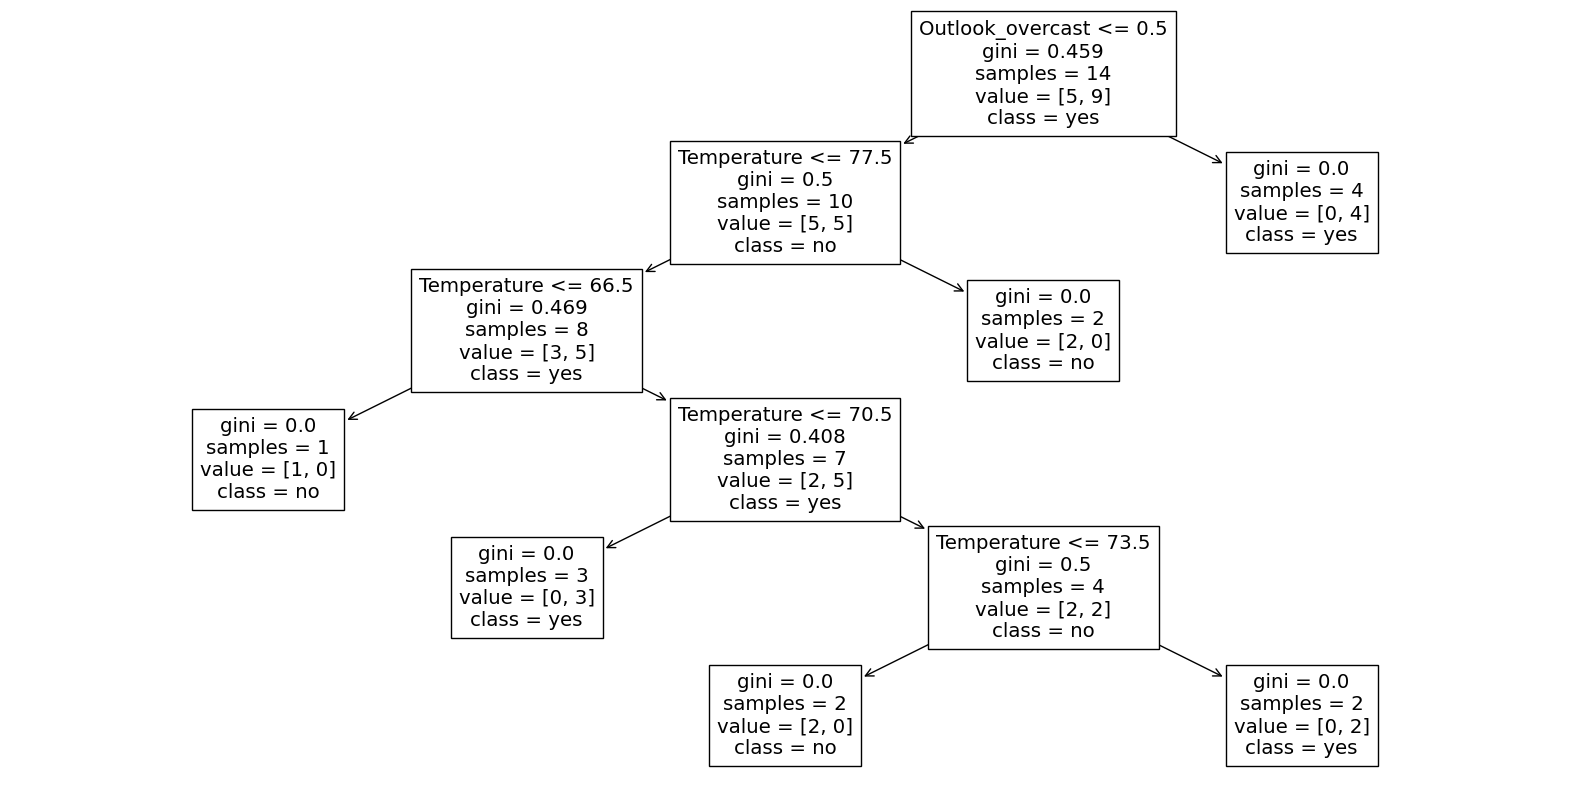

In [38]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(20,10))
tree.plot_tree(estimator,
               feature_names=training_set.columns,
               class_names=label_encoder.classes_)
plt.show()

# Prepare Test Data

In [51]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
test_set = test_dataset.copy()


y_test = label_encoder.fit_transform(test_set["Play"])

test_set.drop(columns="Play", inplace=True)

encoder = OneHotEncoder()
encoded = pd.DataFrame(encoder.fit_transform(test_set[["Outlook", "Wind"]]).toarray(), columns=encoder.get_feature_names_out(["Outlook", "Wind"]))

test_set.drop(columns=["Wind", "Outlook"], inplace=True)
test_set = test_set.join(encoded)

# Evaluate Decision Tree on Test Set

In [56]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = estimator.predict(test_set)

print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))


[[3 2]
 [2 7]]
0.7142857142857143


/Users/alexanderberndt/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
